# Data Manipulation with Pandas

## Page Visits Funnel

Cool T-Shirts Inc. has asked you to analyze data on visits to their website. Your job is to build a funnel, which is a description of how many people continue to the next step of a multi-step process.

In this case, our funnel is going to describe the following process:

    A user visits CoolTShirts.com
    A user adds a t-shirt to their cart
    A user clicks “checkout”
    A user actually purchases a t-shirt

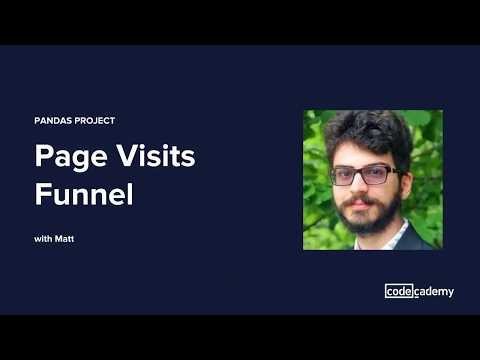

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('WKwG14ozDk4', width = 800, height = 500)

***

## Funnel for Cool T-Shirts Inc.

1. Inspect the DataFrames using head:

* `visits` lists all of the users who have visited the website
* `cart` lists all of the users who have added a t-shirt to their cart
* `checkout` lists all of the users who have started the checkout
* `purchase` lists all of the users who have purchased a t-shirt

In [2]:
import pandas as pd

visits = pd.read_csv('visits.csv',
                     parse_dates=[1])
cart = pd.read_csv('cart.csv',
                   parse_dates=[1])
checkout = pd.read_csv('checkout.csv',
                       parse_dates=[1])
purchase = pd.read_csv('purchase.csv',
                       parse_dates=[1])

In [3]:
visits.head()

,user_id,visit_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00


In [4]:
cart.head()

,user_id,cart_time
0,2be90e7c-9cca-44e0-bcc5-124b945ff168,2017-11-07 20:45:00
1,4397f73f-1da3-4ab3-91af-762792e25973,2017-05-27 01:35:00
2,a9db3d4b-0a0a-4398-a55a-ebb2c7adf663,2017-03-04 10:38:00
3,b594862a-36c5-47d5-b818-6e9512b939b3,2017-09-27 08:22:00
4,a68a16e2-94f0-4ce8-8ce3-784af0bbb974,2017-07-26 15:48:00


In [5]:
checkout.head()

,user_id,checkout_time
0,d33bdc47-4afa-45bc-b4e4-dbe948e34c0d,2017-06-25 09:29:00
1,4ac186f0-9954-4fea-8a27-c081e428e34e,2017-04-07 20:11:00
2,3c9c78a7-124a-4b77-8d2e-e1926e011e7d,2017-07-13 11:38:00
3,89fe330a-8966-4756-8f7c-3bdbcd47279a,2017-04-20 16:15:00
4,3ccdaf69-2d30-40de-b083-51372881aedd,2017-01-08 20:52:00


In [6]:
purchase.head()

,user_id,purchase_time
0,4b44ace4-2721-47a0-b24b-15fbfa2abf85,2017-05-11 04:25:00
1,02e684ae-a448-408f-a9ff-dcb4a5c99aac,2017-09-05 08:45:00
2,4b4bc391-749e-4b90-ab8f-4f6e3c84d6dc,2017-11-20 20:49:00
3,a5dbb25f-3c36-4103-9030-9f7c6241cd8d,2017-01-22 15:18:00
4,46a3186d-7f5a-4ab9-87af-84d05bfd4867,2017-06-11 11:32:00


2. Combine `visits` and `cart` using a left merge.

In [7]:
visits_and_cart = pd.merge(
    visits,
    cart,
    how='left')

visits_and_cart

,user_id,visit_time,cart_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaT
...,...,...,...
1995,33913ac2-03da-45ae-8fc3-fea39df827c6,2017-03-25 03:29:00,NaT
1996,4f850132-b99d-4623-80e6-6e61d003577e,2017-01-08 09:57:00,NaT
1997,f0830b9b-1f5c-4e74-b63d-3f847cc6ce70,2017-09-07 12:56:00,NaT
1998,b01bffa7-63ba-4cd3-9d93-eb1477c23831,2017-07-20 04:37:00,NaT


3. How long is your merged DataFrame?

In [8]:
print(len(visits_and_cart))

2000


4. How many of the timestamps are `null` for the column `cart_time`?<br>
<br>
What do these null rows mean?

In [9]:
sum(pd.isna(visits_and_cart.cart_time))

1652

<b>A</b>: The number of null rows gives us the number of users who did not put a t-shirt into the cart.

5. What percent of users who visited Cool T-Shirts Inc. ended up not placing a t-shirt in their cart?<br>
<br>
Note: To calculate percentages, it will be helpful to turn either the numerator or the denominator into a <i>float</i>, by using `float()`, with the number to convert passed in as input. Otherwise, Python will use integer division, which truncates decimal points.

In [10]:
print(f"The percentage of people who visited the website, but did not place a shirt in their cart is {sum(pd.isna(visits_and_cart.cart_time)) / len(visits_and_cart):.2%}")

The percentage of people who visited the website, but did not place a shirt in their cart is 82.60%


6. Repeat the left merge for `cart` and `checkout` and count `null` values. What percentage of users put items in their cart, but did not proceed to checkout?

In [11]:
cart_and_checkout = pd.merge(
    cart,
    checkout,
    how='left')

print(f"The percentage of people who placed a shirt in their cart, but did not proceed to checkout is {sum(pd.isna(cart_and_checkout.checkout_time)) / len(cart_and_checkout):.2%}")

The percentage of people who placed a shirt in their cart, but did not proceed to checkout is 25.31%


7. Merge all four steps of the funnel, in order, using a series of <i>left merges</i>. Save the results to the variable `all_data`.<br>
<br>
Examine the result using `head`.

In [12]:
all_data = visits\
    .merge(cart, how='left')\
    .merge(checkout, how='left')\
    .merge(purchase, how='left')

all_data.head()

,user_id,visit_time,cart_time,checkout_time,purchase_time
0,943647ef-3682-4750-a2e1-918ba6f16188,2017-04-07 15:14:00,NaT,NaT,NaT
1,0c3a3dd0-fb64-4eac-bf84-ba069ce409f2,2017-01-26 14:24:00,2017-01-26 14:44:00,2017-01-26 14:54:00,2017-01-26 15:08:00
2,6e0b2d60-4027-4d9a-babd-0e7d40859fb1,2017-08-20 08:23:00,2017-08-20 08:31:00,NaT,NaT
3,6879527e-c5a6-4d14-b2da-50b85212b0ab,2017-11-04 18:15:00,NaT,NaT,NaT
4,a84327ff-5daa-4ba1-b789-d5b4caf81e96,2017-02-27 11:25:00,NaT,NaT,NaT


8. What percentage of users proceeded to checkout, but did not purchase a t-shirt?

In [13]:
checkout_and_purchase = pd.merge(
    checkout,
    purchase,
    how='left')

print(f"The percentage of people who proceeded to checkout, but did not purchase a t-shirt is {sum(pd.isna(checkout_and_purchase.purchase_time)) / len(checkout_and_purchase):.2%}")

The percentage of people who proceeded to checkout, but did not purchase a t-shirt is 16.89%


9. Which step of the funnel is weakest (i.e., has the highest percentage of users not completing it)?<br>
<br>
How might Cool T-Shirts Inc. change their website to fix this problem?

<b>A</b>: Out of the examined metrics the percentage of users who did not place a t-shirt is the highest. This can be changed by:
* Checking user behaviour and analyze why users are not placing a t-shirt in the cart
* Performing A/B testing and see what increases the percentage
* Giving the user incentives to add t-shirts to the cart

## Average Time to Purchase

Using the giant merged DataFrame `all_data` that you created, let’s calculate the average time from initial visit to final purchase. Start by adding the following column to your DataFrame:

`all_data['time_to_purchase'] = all_data.purchase_time - all_data.visit_time`

In [14]:
all_data['time_to_purchase'] = all_data.purchase_time - all_data.visit_time

11. Examine the results.

In [15]:
all_data.time_to_purchase

0           NaT
1      00:44:00
2           NaT
3           NaT
4           NaT
         ...   
2367        NaT
2368        NaT
2369        NaT
2370        NaT
2371        NaT
Name: time_to_purchase, Length: 2372, dtype: timedelta64[ns]

12. Calculate the average time to purchase using the following code:<br>
<br>
`print(all_data.time_to_purchase.mean())`

In [16]:
print(all_data.time_to_purchase.mean())

0 days 00:43:53.360160
